<a href="https://colab.research.google.com/github/juhumkwon/-S3I-/blob/main/CL_04_06(%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_DeepLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9208 - loss: 0.2785 - val_accuracy: 0.9630 - val_loss: 0.1258
Epoch 2/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9636 - loss: 0.1235 - val_accuracy: 0.9732 - val_loss: 0.0959
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9740 - loss: 0.0850 - val_accuracy: 0.9745 - val_loss: 0.0894
Epoch 4/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9810 - loss: 0.0630 - val_accuracy: 0.9750 - val_loss: 0.0823
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9793 - val_loss: 0.0739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


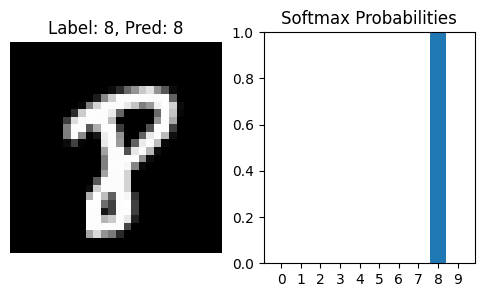

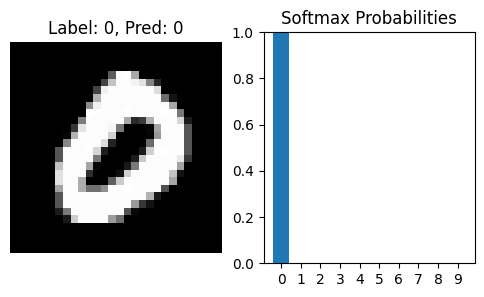

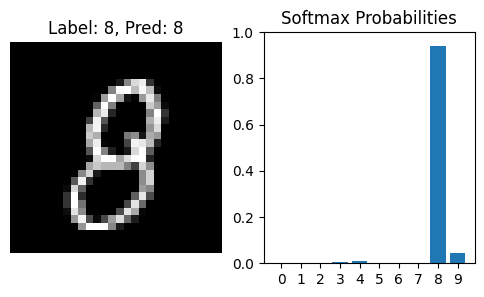

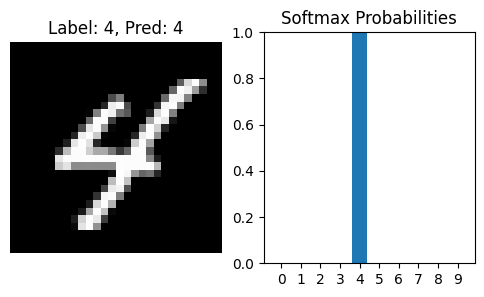

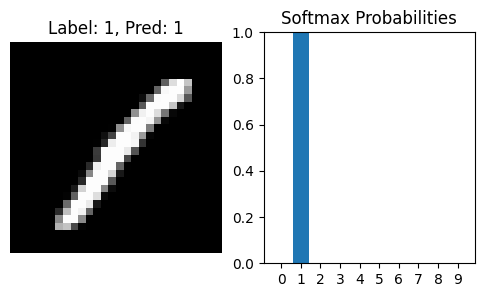

In [2]:
# MNIST 소프트맥스 학습 + 가시화

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. 모델 정의
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

# 5. 테스트 샘플 5개 선택
sample_idx = np.random.choice(len(x_test), 5, replace=False)
x_sample = x_test[sample_idx]
y_sample = y_test[sample_idx]

# 6. 예측
pred_probs = model.predict(x_sample)
pred_classes = np.argmax(pred_probs, axis=1)

# 7. 가시화
for i in range(len(x_sample)):
    plt.figure(figsize=(6,3))

    # 이미지 출력
    plt.subplot(1,2,1)
    plt.imshow(x_sample[i], cmap='gray')
    plt.title(f"Label: {y_sample[i]}, Pred: {pred_classes[i]}")
    plt.axis('off')

    # Softmax 확률 출력
    plt.subplot(1,2,2)
    plt.bar(range(10), pred_probs[i])
    plt.xticks(range(10))
    plt.ylim(0,1)
    plt.title("Softmax Probabilities")

    plt.show()
